# Conformal completion of Minkowski spacetime
This Jupyter/SageMath worksheet is relative to the article
[Algunos estudios analiticos de la geometria de Schwarzschild] and it is based on the worksheets present in the lectures
[Geometry and physics of black holes](https://relativite.obspm.fr/blackholes/)

*NB:* a version of SageMath at least equal to 9.3 is required to run this notebook: 

In [1]:
version()

'SageMath version 9.3, Release Date: 2021-05-09'

First we set up the notebook to display mathematical objects using LaTeX formatting:

In [2]:
%display latex

## Spherical coordinates on Minkowski spacetime

We declare the spacetime manifold $M$:

In [3]:
M = Manifold(4, 'M', structure='Lorentzian')
print(M)

4-dimensional Lorentzian manifold M


and the spherical coordinates $(t,r,\theta,\phi)$ as a chart on $M$:

In [4]:
XS.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')
XS

Chart (M, (t, r, th, ph))

In [5]:
XS.coord_range()

t: (-oo, +oo); r: (0, +oo); th: (0, pi); ph: (0, 2*pi)

In term of these coordinates, we set up Minkowski metric as

In [6]:
g = M.metric()
g[0,0] = -1
g[1,1] = 1
g[2,2] = r^2
g[3,3] = r^2*sin(th)^2
g.display()

g = -dt*dt + dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

## Null coordinates

Let us introduce the null coordinates $v=t-r$ (retarded time) and $u=t+r$ (advanced time):

In [7]:
XN.<v,u,th,ph> = M.chart(r'v u th:(0,pi):\theta ph:(0,2*pi):\phi')
XN.add_restrictions(u>v)
XN

Chart (M, (v, u, th, ph))

In [8]:
XN.coord_range()

v: (-oo, +oo); u: (-oo, +oo); th: (0, pi); ph: (0, 2*pi)

In [9]:
XS_to_XN = XS.transition_map(XN, [t-r, t+r, th, ph])
XS_to_XN.display()

v = -r + t
u = r + t
th = th
ph = ph

In [10]:
XS_to_XN.inverse().display()

t = 1/2*u + 1/2*v
r = 1/2*u - 1/2*v
th = th
ph = ph

In terms of the null coordinates $(u,v,\theta,\phi)$, the Minkowski metric writes

In [11]:
g.display(XN)

g = -1/2 dv*du - 1/2 du*dv + (1/4*u^2 - 1/2*u*v + 1/4*v^2) dth*dth + (1/4*u^2*sin(th)^2 - 1/2*u*v*sin(th)^2 + 1/4*v^2*sin(th)^2) dph*dph

For a better display, let us factor the metric components:

In [12]:
g.apply_map(factor, frame=XN.frame(), chart=XN,
            keep_other_components=True)
g.display(XN)

g = -1/2 dv*du - 1/2 du*dv + 1/4*(u - v)^2 dth*dth + 1/4*(u - v)^2*sin(th)^2 dph*dph

Let us plot the coordinate grid $(u,v)$ in terms of the coordinates $(t,r)$:

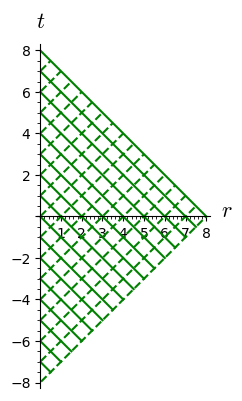

In [13]:
graph = XN.plot(XS, ambient_coords=(r,t), fixed_coords={th: pi/2, ph: pi}, 
                number_values=17, plot_points=200, color='green', 
                style={u: '--', v: '-'}, thickness=1.5)
graph

## Compactified null coordinates

Instead of $(v,u)$, which span $\mathbb{R}$, let consider the coordinates $U = \mathrm{atan}\,  u$ and $V = \mathrm{atan}\, v$, which span $\left(-\frac{\pi}{2}, \frac{\pi}{2}\right)$:

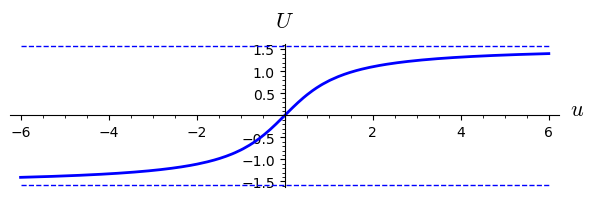

In [14]:
graph = plot(atan(u), (u,-6, 6), thickness=2, axes_labels=[r'$u$', r'$U$']) \
        + line([(-6,-pi/2), (6,-pi/2)], linestyle='--') \
        + line([(-6,pi/2), (6,pi/2)], linestyle='--')
show(graph, aspect_ratio=1)

In [15]:
graph.save('glo_atan.png', aspect_ratio=1)

In [16]:
XNC.<U,V,th,ph> = M.chart(r'V:(-pi/2,pi/2) U:(-pi/2,pi/2) th:(0,pi):\theta ph:(0,2*pi):\phi')
XNC.add_restrictions(U>V)
XNC

Chart (M, (V, U, th, ph))

In [17]:
XNC.coord_range()

V: (-1/2*pi, 1/2*pi); U: (-1/2*pi, 1/2*pi); th: (0, pi); ph: (0, 2*pi)

In [18]:
XN_to_XNC = XN.transition_map(XNC, [atan(v), atan(u), th, ph])
XN_to_XNC.display()

V = arctan(v)
U = arctan(u)
th = th
ph = ph

In [19]:
XN_to_XNC.inverse().display()

v = sin(V)/cos(V)
u = sin(U)/cos(U)
th = th
ph = ph

Expressed in terms of the coordinates $(U,V,\theta,\phi)$, the metric tensor is

In [20]:
g.display(XNC)

g = -1/2/(cos(U)^2*cos(V)^2) dV*dU - 1/2/(cos(U)^2*cos(V)^2) dU*dV + 1/4*(cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2)/(cos(U)^2*cos(V)^2) dth*dth + 1/4*(cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2)*sin(th)^2/(cos(U)^2*cos(V)^2) dph*dph

Again, for a better display, we may factor the metric components:

In [21]:
g.apply_map(factor, frame=XNC.frame(), chart=XNC, keep_other_components=True)
g.display(XNC)

g = -1/2/(cos(U)^2*cos(V)^2) dV*dU - 1/2/(cos(U)^2*cos(V)^2) dU*dV + 1/4*(cos(V)*sin(U) - cos(U)*sin(V))^2/(cos(U)^2*cos(V)^2) dth*dth + 1/4*(cos(V)*sin(U) - cos(U)*sin(V))^2*sin(th)^2/(cos(U)^2*cos(V)^2) dph*dph

Let us call $\Omega^{-2}$ the common factor

In [22]:
Omega = M.scalar_field({XNC: 2*cos(U)*cos(V)}, name='Omega', 
                       latex_name=r'\Omega')
Omega.display()

Omega: M --> R
   (v, u, th, ph) |--> 2/(sqrt(u^2 + 1)*sqrt(v^2 + 1))
   (V, U, th, ph) |--> 2*cos(U)*cos(V)

In [23]:
Omega.display(XS)

Omega: M --> R
   (t, r, th, ph) |--> 2/(sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1))

## Conformal metric

We introduce the metric $\tilde{g}=\Omega^2 g$

In [24]:
gt = M.lorentzian_metric('gt', latex_name=r'\tilde{g}')
gt.set(Omega^2*g)
gt.display(XNC)

gt = -2 dV*dU - 2 dU*dV + (cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2) dth*dth + (cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2)*sin(th)^2 dph*dph

Clearly the metric components ${\tilde g}_{\theta\theta}$ and ${\tilde g}_{\phi\phi}$ can be simplified further. Let us do it by hand, by extracting the symbolic expression via `expr()`:

In [25]:
g22 = gt[XNC.frame(), 2, 2, XNC].expr()
g22

cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2

In [26]:
g22_simpl = g22.factor().reduce_trig()
g22_simpl

sin(-U + V)^2

In [27]:
g33st = gt[XNC.frame(), 3, 3, XNC].expr() / sin(th)^2
g33st

cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2

In [28]:
g33st.expand_trig()

cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2

In [29]:
g33_simpl = g33st.factor().reduce_trig() * sin(th)^2
g33_simpl

sin(-U + V)^2*sin(th)^2

In [30]:
gt.add_comp(XNC.frame())[2,2, XNC] = g22_simpl
gt.add_comp(XNC.frame())[3,3, XNC] = g33_simpl

Hence the final form of the conformal metric in terms of the compactified null coordinates:

In [31]:
gt.display(XNC)

gt = -2 dV*dU - 2 dU*dV + sin(-U + V)^2 dth*dth + sin(-U + V)^2*sin(th)^2 dph*dph

In terms of the non-compactified null coordinates $(u,v,\theta,\phi)$:

In [32]:
gt.display(XN)

gt = -2/((u^2 + 1)*v^2 + u^2 + 1) dv*du - 2/((u^2 + 1)*v^2 + u^2 + 1) du*dv + (u^2 - 2*u*v + v^2)/((u^2 + 1)*v^2 + u^2 + 1) dth*dth + (u^2*sin(th)^2 - 2*u*v*sin(th)^2 + v^2*sin(th)^2)/((u^2 + 1)*v^2 + u^2 + 1) dph*dph

In [33]:
gt.apply_map(factor, frame=XN.frame(), chart=XN,
            keep_other_components=True)
gt.display(XN)

gt = -2/((u^2 + 1)*(v^2 + 1)) dv*du - 2/((u^2 + 1)*(v^2 + 1)) du*dv + (u - v)^2/((u^2 + 1)*(v^2 + 1)) dth*dth + (u - v)^2*sin(th)^2/((u^2 + 1)*(v^2 + 1)) dph*dph

and in terms of the default coordinates $(t,r,\theta,\phi)$:

In [34]:
gt.display()

gt = -4/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1) dt*dt + 4/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1) dr*dr + 4*r^2/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1) dth*dth + 4*r^2*sin(th)^2/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1) dph*dph

In [35]:
gt.apply_map(factor, keep_other_components=True)
gt.display()

gt = -4/((r^2 + 2*r*t + t^2 + 1)*(r^2 - 2*r*t + t^2 + 1)) dt*dt + 4/((r^2 + 2*r*t + t^2 + 1)*(r^2 - 2*r*t + t^2 + 1)) dr*dr + 4*r^2/((r^2 + 2*r*t + t^2 + 1)*(r^2 - 2*r*t + t^2 + 1)) dth*dth + 4*r^2*sin(th)^2/((r^2 + 2*r*t + t^2 + 1)*(r^2 - 2*r*t + t^2 + 1)) dph*dph

## Einstein cylinder coordinates

Let us introduce some coordinates $(T,R)$ such that the null coordinates $(U,V)$ are
respectively half the retarded time $T -R$ and half the advanced time $T+R$:

In [36]:
XC.<T,R,th,ph> = M.chart(r'T:(-pi,pi):T R:(0,pi):R th:(0,pi):\theta ph:(0,2*pi):\phi')
XC.add_restrictions(T<pi-R)
XC

Chart (M, (T, R, th, ph))

In [37]:
XC.coord_range()

T: (-pi, pi); R: (0, pi); th: (0, pi); ph: (0, 2*pi)

In [38]:
XC_to_XNC = XC.transition_map(XNC, [(T-R)/2, (T+R)/2, th, ph])
XC_to_XNC.display()

V = -1/2*R + 1/2*T
U = 1/2*R + 1/2*T
th = th
ph = ph

In [39]:
XC_to_XNC.inverse().display()

T = U + V
R = U - V
th = th
ph = ph

The conformal metric takes then the form of the standard metric on the Einstein cylinder
$\mathbb{R}\times\mathbb{S}^3$:

In [40]:
gt.display(XC)

gt = -dT*dT + dR*dR + sin(R)^2 dth*dth + sin(R)^2*sin(th)^2 dph*dph

The square of the conformal factor expressed in all the coordinates introduced so far:

In [41]:
(Omega^2).display()

Omega^2: M --> R
   (t, r, th, ph) |--> 4/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1)
   (v, u, th, ph) |--> 4/((u^2 + 1)*v^2 + u^2 + 1)
   (V, U, th, ph) |--> 4*cos(U)^2*cos(V)^2
   (T, R, th, ph) |--> 4*cos(1/2*R)^4*cos(1/2*T)^4 - 8*cos(1/2*R)^2*cos(1/2*T)^2*sin(1/2*R)^2*sin(1/2*T)^2 + 4*sin(1/2*R)^4*sin(1/2*T)^4

The transition map $(t,r,\theta,\phi) \mapsto (T,R,\theta,\phi)$ is obtained by combining the various transition maps obtained so far:

In [42]:
XS_to_XC = M.coord_change(XNC, XC) * M.coord_change(XN, XNC) * M.coord_change(XS, XN)
XS_to_XC.display()

T = arctan(r + t) + arctan(-r + t)
R = arctan(r + t) - arctan(-r + t)
th = th
ph = ph

In [43]:
XC_to_XS = M.coord_change(XN, XS) * M.coord_change(XNC, XN) * M.coord_change(XC, XNC)
XC_to_XS.display()

t = cos(1/2*T)*sin(1/2*T)/(cos(1/2*R)^2*cos(1/2*T)^2 - sin(1/2*R)^2*sin(1/2*T)^2)
r = cos(1/2*R)*sin(1/2*R)/(cos(1/2*R)^2*cos(1/2*T)^2 - sin(1/2*R)^2*sin(1/2*T)^2)
th = th
ph = ph

The expressions for $t$ and $r$ can be simplified via `reduce_trig`:

In [44]:
t_c = XC_to_XS(T,R,th,ph)[0]
r_c = XC_to_XS(T,R,th,ph)[1]

XS_to_XC.set_inverse(t_c.reduce_trig(), r_c.reduce_trig(), th, ph)

Check of the inverse coordinate transformation:
  t == t  *passed*
  r == r  *passed*
  th == th  *passed*
  ph == ph  *passed*
  T == arctan((sin(R) + sin(T))/(cos(R) + cos(T))) + arctan(-(sin(R) - sin(T))/(cos(R) + cos(T)))  **failed**
  R == arctan((sin(R) + sin(T))/(cos(R) + cos(T))) - arctan(-(sin(R) - sin(T))/(cos(R) + cos(T)))  **failed**
  th == th  *passed*
  ph == ph  *passed*
NB: a failed report can reflect a mere lack of simplification.


In [45]:
XC_to_XS = XS_to_XC.inverse()
XC_to_XS.display()

t = sin(T)/(cos(R) + cos(T))
r = sin(R)/(cos(R) + cos(T))
th = th
ph = ph

## Conformal Penrose diagram

Let us draw the coordinate grid $(t,r)$ in terms of the coordinates $(T,R)$:

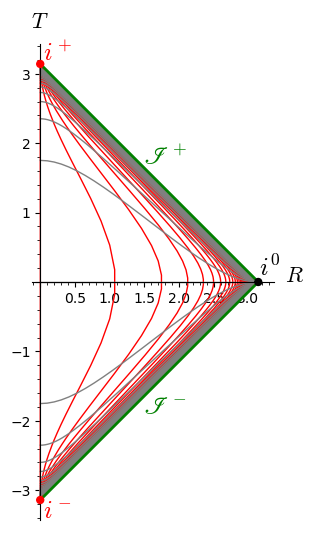

In [46]:
graphXS = XS.plot(XC, ambient_coords=(R, T), fixed_coords={th: pi/2, ph: pi}, 
                  max_range=30, number_values=51, plot_points=250, 
                  color={t: 'red', r: 'grey'}, style={t:'-', r:'-'}) 
graph_i0 = circle((pi,0), 0.05, fill=True, color='black') + \
           text(r"$i^0$", (3.3, 0.2), fontsize=18, color='black') 
graph_ip = circle((0,pi), 0.05, fill=True, color='red') + \
           text(r"$i^+$", (0.25, 3.3), fontsize=18, color='red')
graph_im = circle((0,-pi), 0.05, fill=True, color='red') + \
           text(r"$i^-$", (0.25, -3.3), fontsize=18, color='red')
graph_Ip = line([(0,pi), (pi,0)], color='green', thickness=2) + \
           text(r"$\mathscr{I}^+$", (1.8, 1.8), fontsize=18, color='green')
graph_Im = line([(0,-pi), (pi,0)], color='green', thickness=2) + \
           text(r"$\mathscr{I}^-$", (1.8, -1.8), fontsize=18, color='green')
graph = graphXS + graph_i0 + graph_ip + graph_im + graph_Ip + graph_Im
show(graph, figsize=8)

In [47]:
graph.save('glo_conf_diag_Mink.png', figsize=8)

Some blow-up near $i^0$:

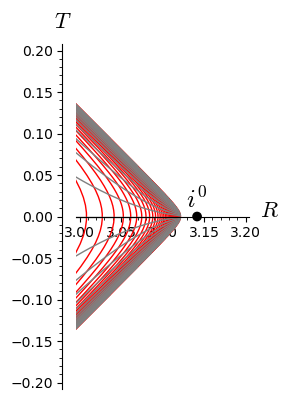

In [48]:
graph = XS.plot(XC, ambient_coords=(R, T), fixed_coords={th: pi/2, ph: pi}, 
                max_range=100, number_values=41, plot_points=200, 
                color={t: 'red', r: 'grey'},style={t:'-', r:'-'})
graph += circle((pi,0), 0.005, fill=True, color='black') + \
         text(r"$i^0$", (pi, 0.02), fontsize=18, color='black') 
show(graph, xmin=3., xmax=3.2, ymin=-0.2, ymax=0.2, aspect_ratio=1)

In [49]:
graph.save('glo_conf_diag_Mink_zoom.png', figsize=8)

To produce a more satisfactory figure, let us use some logarithmic radial coordinate:

In [50]:
XL.<t, rh, th, ph> = M.chart(r't rh:\rho th:(0,pi):\theta ph:(0,2*pi):\phi')
XL

Chart (M, (t, rh, th, ph))

In [51]:
XS_to_XL = XS.transition_map(XL, [t, ln(r), th, ph])
XS_to_XL.display()

t = t
rh = log(r)
th = th
ph = ph

In [52]:
XS_to_XL.inverse().display()

t = t
r = e^rh
th = th
ph = ph

In [53]:
XL_to_XC = M.coord_change(XS, XC) * M.coord_change(XL, XS)
XC_to_XL = M.coord_change(XS, XL) * M.coord_change(XC, XS)

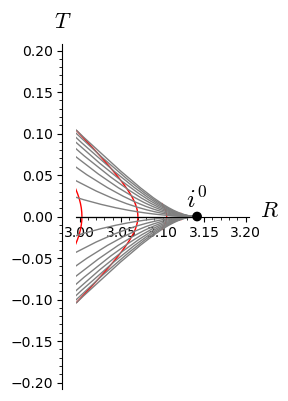

In [54]:
graph = XL.plot(XC, ambient_coords=(R, T), fixed_coords={th: pi/2, ph: pi}, 
                ranges={t: (-20, 20), rh: (-2, 10)}, number_values=19, 
                color={t: 'red', rh: 'grey'}, style={t:'-', rh:'-'})
graph += circle((pi,0), 0.005, fill=True, color='black') + \
         text(r"$i^0$", (pi, 0.02), fontsize=18, color='black') 
show(graph, xmin=3., xmax=3.2, ymin=-0.2, ymax=0.2, aspect_ratio=1)

In [55]:
graph.save('glo_conf_diag_Mink_log.png', figsize=8)

### Null radial geodesics in the conformal diagram

To get a view of the null radial geodesics in the conformal diagram, it suffices to plot the chart $(u,v,\theta,\phi)$ in terms of the chart $(T,R,\theta,\phi)$. 
The following plot shows 
- the null geodesics defined by $(v,\theta,\phi) = (v_0, \pi/2,\pi)$ for 17 values of $v_0$ evenly spaced in $[-8,8]$ (dashed lines) 
- the null geodesics defined by $(u,\theta,\phi) = (u_0, \pi/2,\pi)$ for 17 values of $u_0$ evenly spaced in $[-8,8]$ (solid lines)

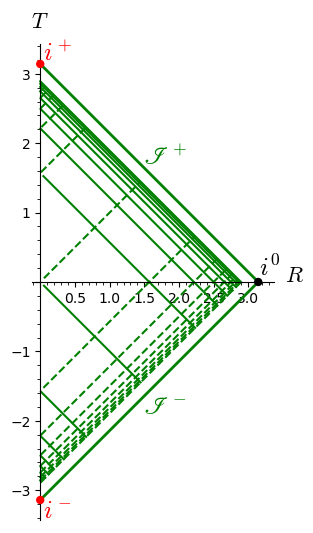

In [56]:
graphXN = XN.plot(XC, ambient_coords=(R, T), fixed_coords={th: pi/2, ph: pi}, 
                  number_values=17, plot_points=150, color='green', 
                  style={u: '--', v: '-'}, thickness=1.5)
graph = graphXN + graph_i0 + graph_ip + graph_im + graph_Ip + graph_Im
show(graph, figsize=8)

In [57]:
graph.save('glo_conf_Mink_null.png', figsize=8)

## Einstein static universe

In [58]:
E = Manifold(4, 'E')
print(E)

4-dimensional differentiable manifold E


In [59]:
XE.<T,R,th,ph> = E.chart(r'T R:(0,pi):R th:(0,pi):\theta ph:(0,2*pi):\phi')
XE

Chart (E, (T, R, th, ph))

In [60]:
XE.coord_range()

T: (-oo, +oo); R: (0, pi); th: (0, pi); ph: (0, 2*pi)

In [61]:
XC.coord_range()

T: (-pi, pi); R: (0, pi); th: (0, pi); ph: (0, 2*pi)

## Embedding of $M$ in $E$

In [62]:
Phi = M.diff_map(E, {(XC, XE): [T, R, th, ph]},
                 name='Phi', latex_name=r'\Phi')
print(Phi)
Phi.display()

Differentiable map Phi from the 4-dimensional Lorentzian manifold M to the 4-dimensional differentiable manifold E


Phi: M --> E
   (t, r, th, ph) |--> (T, R, th, ph) = (arctan(r + t) + arctan(-r + t), arctan(r + t) - arctan(-r + t), th, ph)
   (v, u, th, ph) |--> (T, R, th, ph) = (arctan(u) + arctan(v), arctan(u) - arctan(v), th, ph)
   (V, U, th, ph) |--> (T, R, th, ph) = (arctan(sin(U)/cos(U)) + arctan(sin(V)/cos(V)), arctan(sin(U)/cos(U)) - arctan(sin(V)/cos(V)), th, ph)
   (T, R, th, ph) |--> (T, R, th, ph) = (T, R, th, ph)
   (t, rh, th, ph) |--> (T, R, th, ph) = (arctan(t + e^rh) + arctan(t - e^rh), arctan(t + e^rh) - arctan(t - e^rh), th, ph)

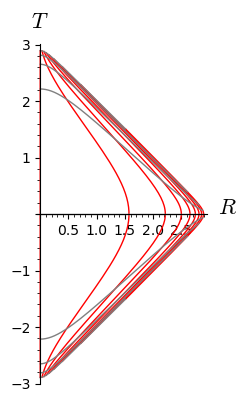

In [63]:
XS.plot(XE, mapping=Phi, ambient_coords=(R, T), fixed_coords={th: pi/2, ph: pi}, 
        plot_points=200, color={t: 'red', r: 'grey'})

## Embedding of $E$ in $\mathbb{R}^5$

In [64]:
R5 = Manifold(5, 'R^5', latex_name=r'\mathbb{R}^5')
print(R5)

5-dimensional differentiable manifold R^5


In [65]:
X5.<T,W,X,Y,Z> = R5.chart(r'T W X Y Z')
X5

Chart (R^5, (T, W, X, Y, Z))

In [66]:
Psi = E.diff_map(R5, {(XE, X5): [T,
                                 cos(R),
                                 sin(R)*sin(th)*cos(ph), 
                                 sin(R)*sin(th)*sin(ph), 
                                 sin(R)*cos(th)]},
                 name='Psi', latex_name=r'\Psi')
print(Psi)
Psi.display()

Differentiable map Psi from the 4-dimensional differentiable manifold E to the 5-dimensional differentiable manifold R^5


Psi: E --> R^5
   (T, R, th, ph) |--> (T, W, X, Y, Z) = (T, cos(R), cos(ph)*sin(R)*sin(th), sin(R)*sin(ph)*sin(th), cos(th)*sin(R))

The Einstein cylinder:

In [67]:
graphE = XE.plot(X5, ambient_coords=(W,X,T), mapping=Psi, 
                 fixed_coords={th:pi/2, ph:0.001}, max_range=4, 
                 number_values=9, color='silver', thickness=0.5,
                 label_axes=False)  # phi = 0 
graphE += XE.plot(X5, ambient_coords=(W,X,T), mapping=Psi, 
                  fixed_coords={th:pi/2, ph:pi}, max_range=4, 
                  number_values=9, color='silver', thickness=0.5,
                  label_axes=False)  # phi = pi
show(graphE, aspect_ratio=1, axes_labels=['W', 'X', 'T'])

Graphics3d Object

## Embedding of $M$ in $\mathbb{R}^5$

The embedding $\Theta:\, M\rightarrow \mathbb{R}^5$ is obtained by composition of the embeddings
$\Phi:\, M\rightarrow E$ and $\Psi:\, E\rightarrow \mathbb{R}^5$:

In [68]:
Theta = Psi * Phi
print(Theta)
Theta.display()

Differentiable map from the 4-dimensional Lorentzian manifold M to the 5-dimensional differentiable manifold R^5


M --> R^5
   (t, r, th, ph) |--> (T, W, X, Y, Z) = (arctan(r + t) + arctan(-r + t), -sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1)*(r^2 - t^2 - 1)/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1), 2*sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1)*r*cos(ph)*sin(th)/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1), 2*sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1)*r*sin(ph)*sin(th)/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1), 2*sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1)*r*cos(th)/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1))
   (v, u, th, ph) |--> (T, W, X, Y, Z) = (arctan(u) + arctan(v), sqrt(u^2 + 1)*(u*v + 1)*sqrt(v^2 + 1)/((u^2 + 1)*v^2 + u^2 + 1), (u*cos(ph)*sin(th) - v*cos(ph)*sin(th))*sqrt(u^2 + 1)*sqrt(v^2 + 1)/((u^2 + 1)*v^2 + u^2 + 1), (u*sin(ph)*sin(th) - v*sin(ph)*sin(th))*sqrt(u^2 + 1)*sqrt(v^2 + 1)/((u^2 + 1)*v^2 + u^2 + 1), sqrt(u^2 + 1)*sqrt(v^2 + 1)*(u*cos(th) - v*cos(th))/((u^2 + 1)*v^2 + u^2 + 1))
   (V, U, th, ph) |--> (T, W, X, Y, Z) = (arctan(sin(U)/cos(U)) + arctan(sin(V)/cos(V)), cos(U)*cos(V) + sin(U)*sin(V), (cos(V)*sin(U) - cos(U)*sin(V))*cos(ph)*sin(th), (cos(V)*sin(U) - cos(U)*sin(V))*sin(ph)*sin(th), (cos(V)*sin(U) - cos(U)*sin(V))*cos(th))
   (T, R, th, ph) |--> (T, W, X, Y, Z) = (T, cos(R), cos(ph)*sin(R)*sin(th), sin(R)*sin(ph)*sin(th), cos(th)*sin(R))
   (t, rh, th, ph) |--> (T, W, X, Y, Z) = (arctan(t + e^rh) + arctan(t - e^rh), sqrt(t^2 + 2*t*e^rh + e^(2*rh) + 1)*sqrt(t^2 - 2*t*e^rh + e^(2*rh) + 1)*(t^2 - e^(2*rh) + 1)/(t^4 - 2*t^2*(e^(2*rh) - 1) + e^(4*rh) + 2*e^(2*rh) + 1), 2*sqrt(t^2 + 2*t*e^rh + e^(2*rh) + 1)*sqrt(t^2 - 2*t*e^rh + e^(2*rh) + 1)*cos(ph)*e^rh*sin(th)/(t^4 - 2*t^2*(e^(2*rh) - 1) + e^(4*rh) + 2*e^(2*rh) + 1), 2*sqrt(t^2 + 2*t*e^rh + e^(2*rh) + 1)*sqrt(t^2 - 2*t*e^rh + e^(2*rh) + 1)*e^rh*sin(ph)*sin(th)/(t^4 - 2*t^2*(e^(2*rh) - 1) + e^(4*rh) + 2*e^(2*rh) + 1), 2*sqrt(t^2 + 2*t*e^rh + e^(2*rh) + 1)*sqrt(t^2 - 2*t*e^rh + e^(2*rh) + 1)*cos(th)*e^rh/(t^4 - 2*t^2*(e^(2*rh) - 1) + e^(4*rh) + 2*e^(2*rh) + 1))

In [69]:
graphM = XS.plot(X5, ambient_coords=(W,X,T), mapping=Theta, 
                 fixed_coords={th:pi/2, ph:0.001}, max_range=30, 
                 number_values=51, plot_points=250, color={t:'red', r:'black'}, 
                 label_axes=False)  # phi = 0 
graphM += XS.plot(X5, ambient_coords=(W,X,T), mapping=Theta, 
                  fixed_coords={th:pi/2, ph:pi}, max_range=30, 
                  number_values=51, plot_points=250, color={t:'red', r:'black'}, 
                  label_axes=False)  # phi = pi
show(graphE+graphM, aspect_ratio=1, axes_labels=['W', 'X', 'T'])

Graphics3d Object

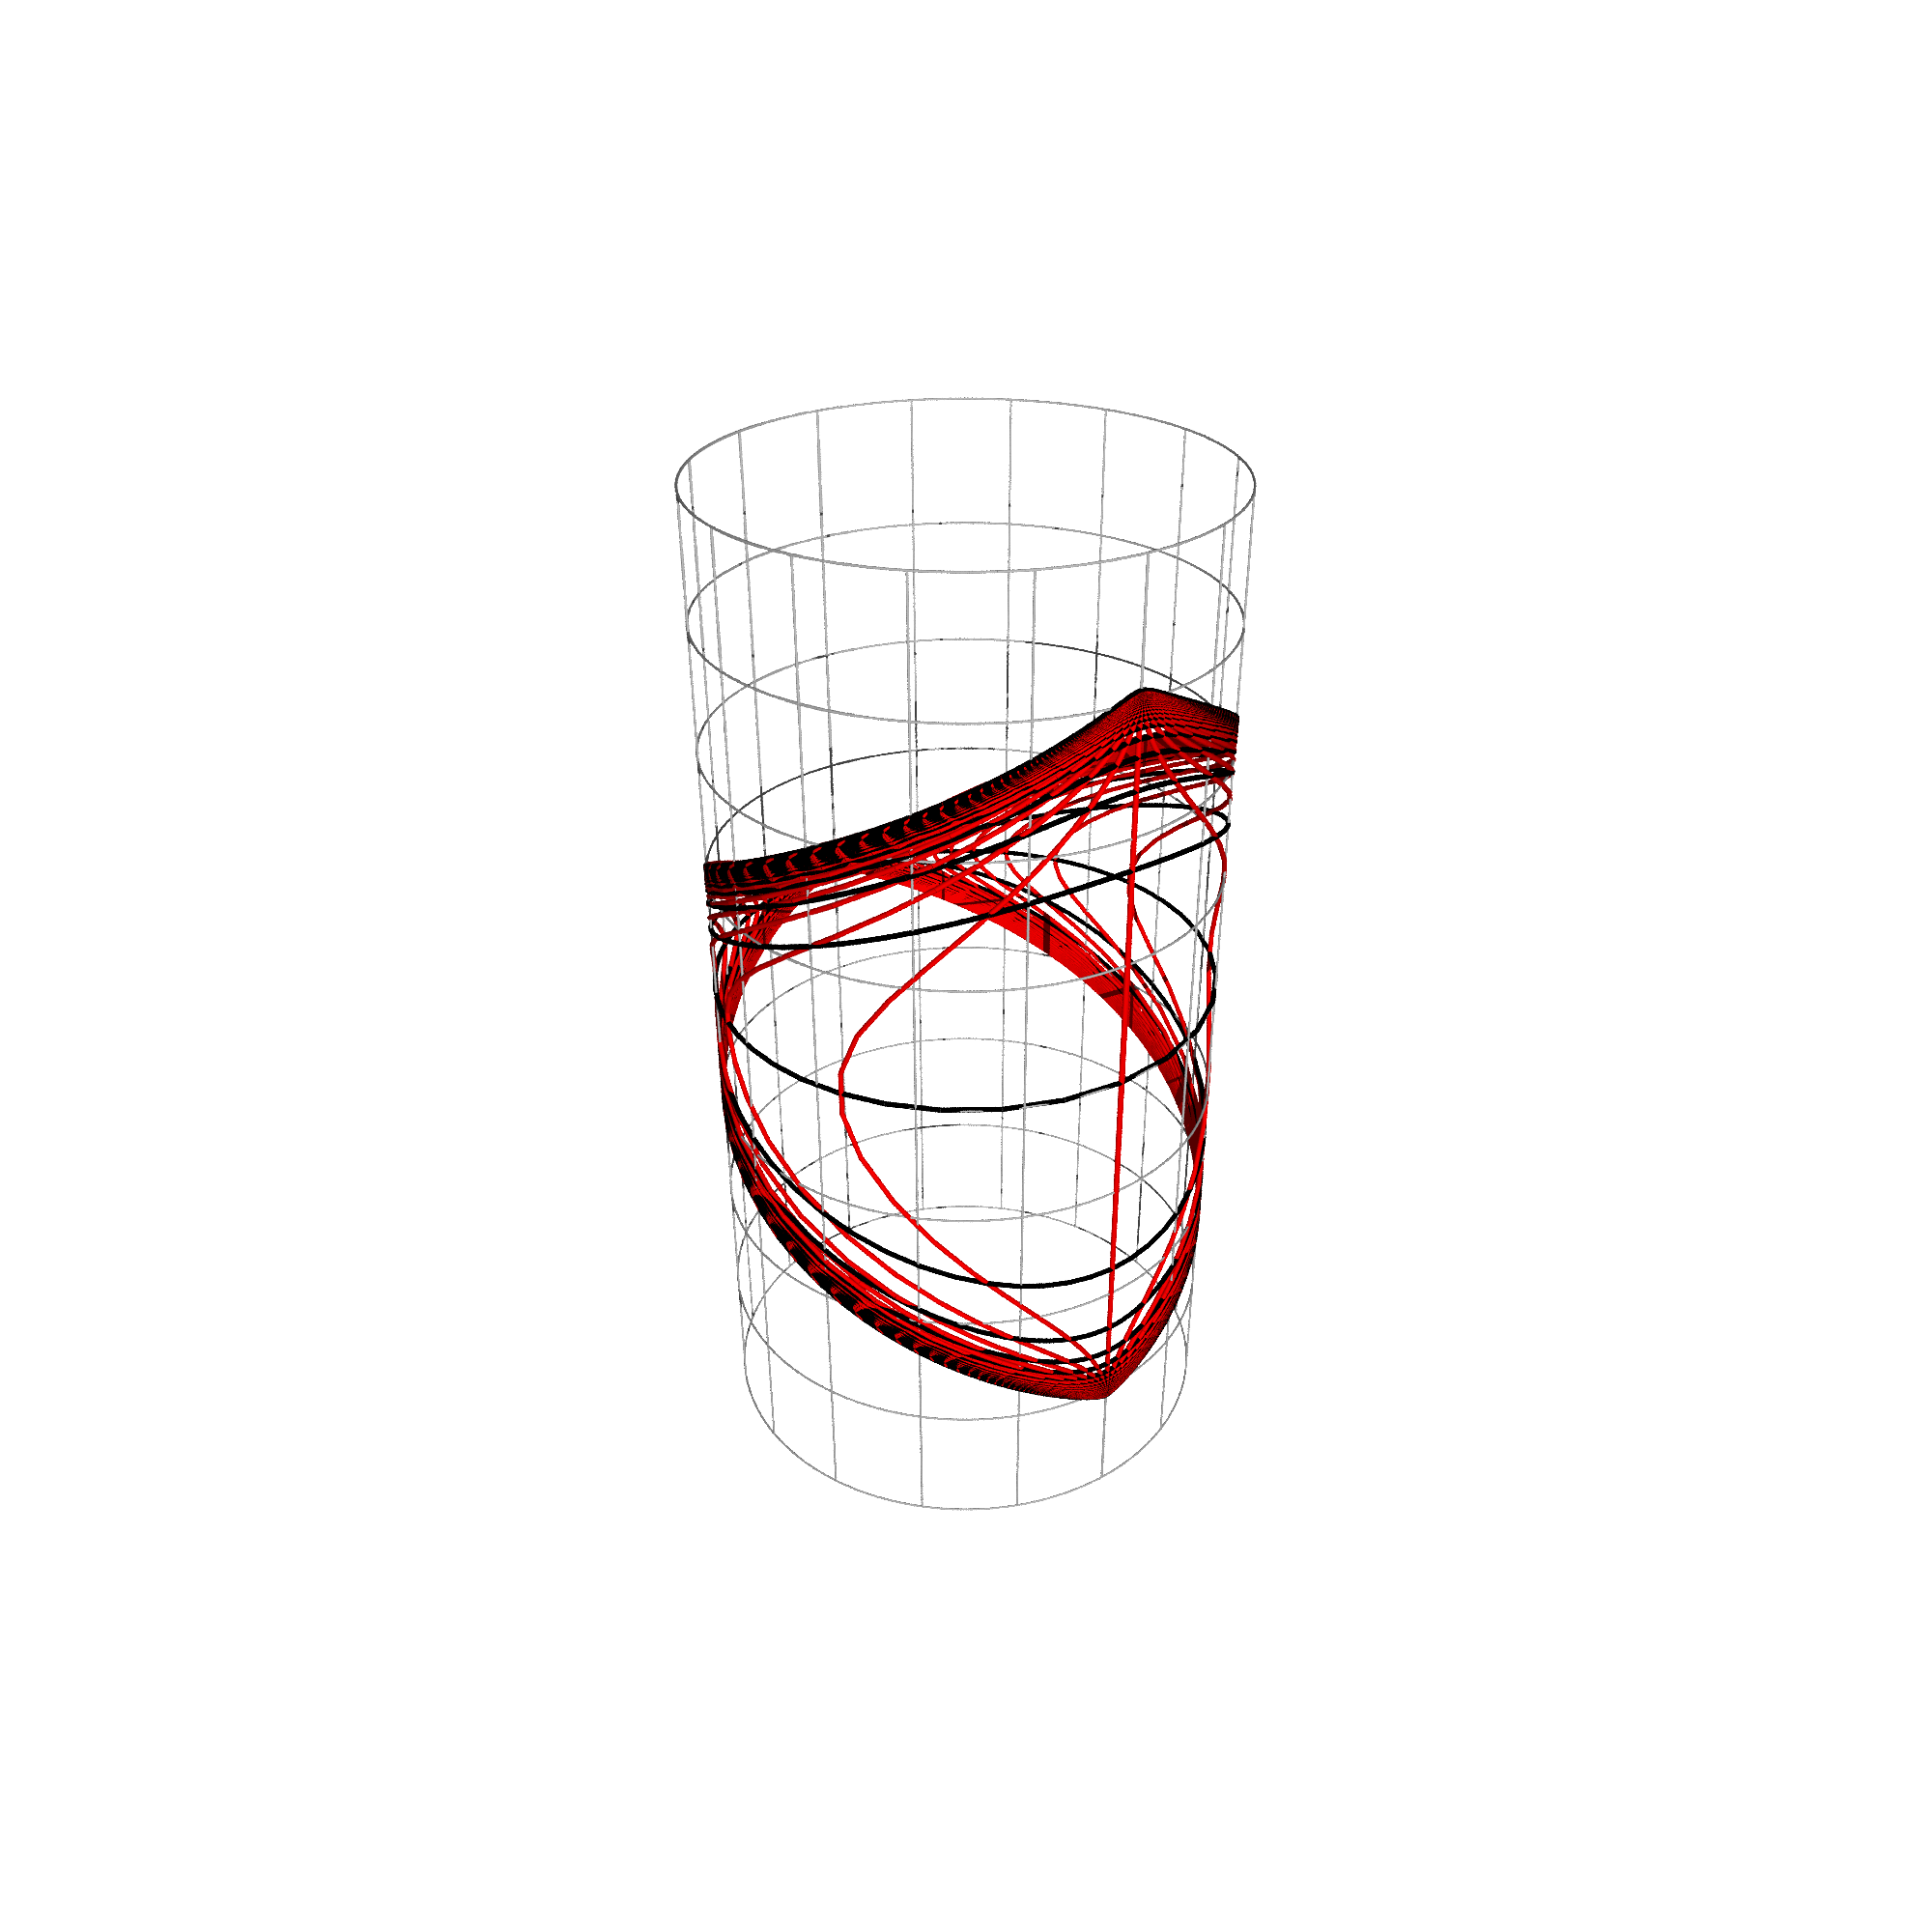

In [70]:
graph = (graphE+graphM).rotate((0,0,1), 0.2)
show(graph, aspect_ratio=(2,2,1), viewer='tachyon', 
     frame=False, figsize=20)

In [71]:
graph.save('Einstein_static_universe.png', figsize=20)

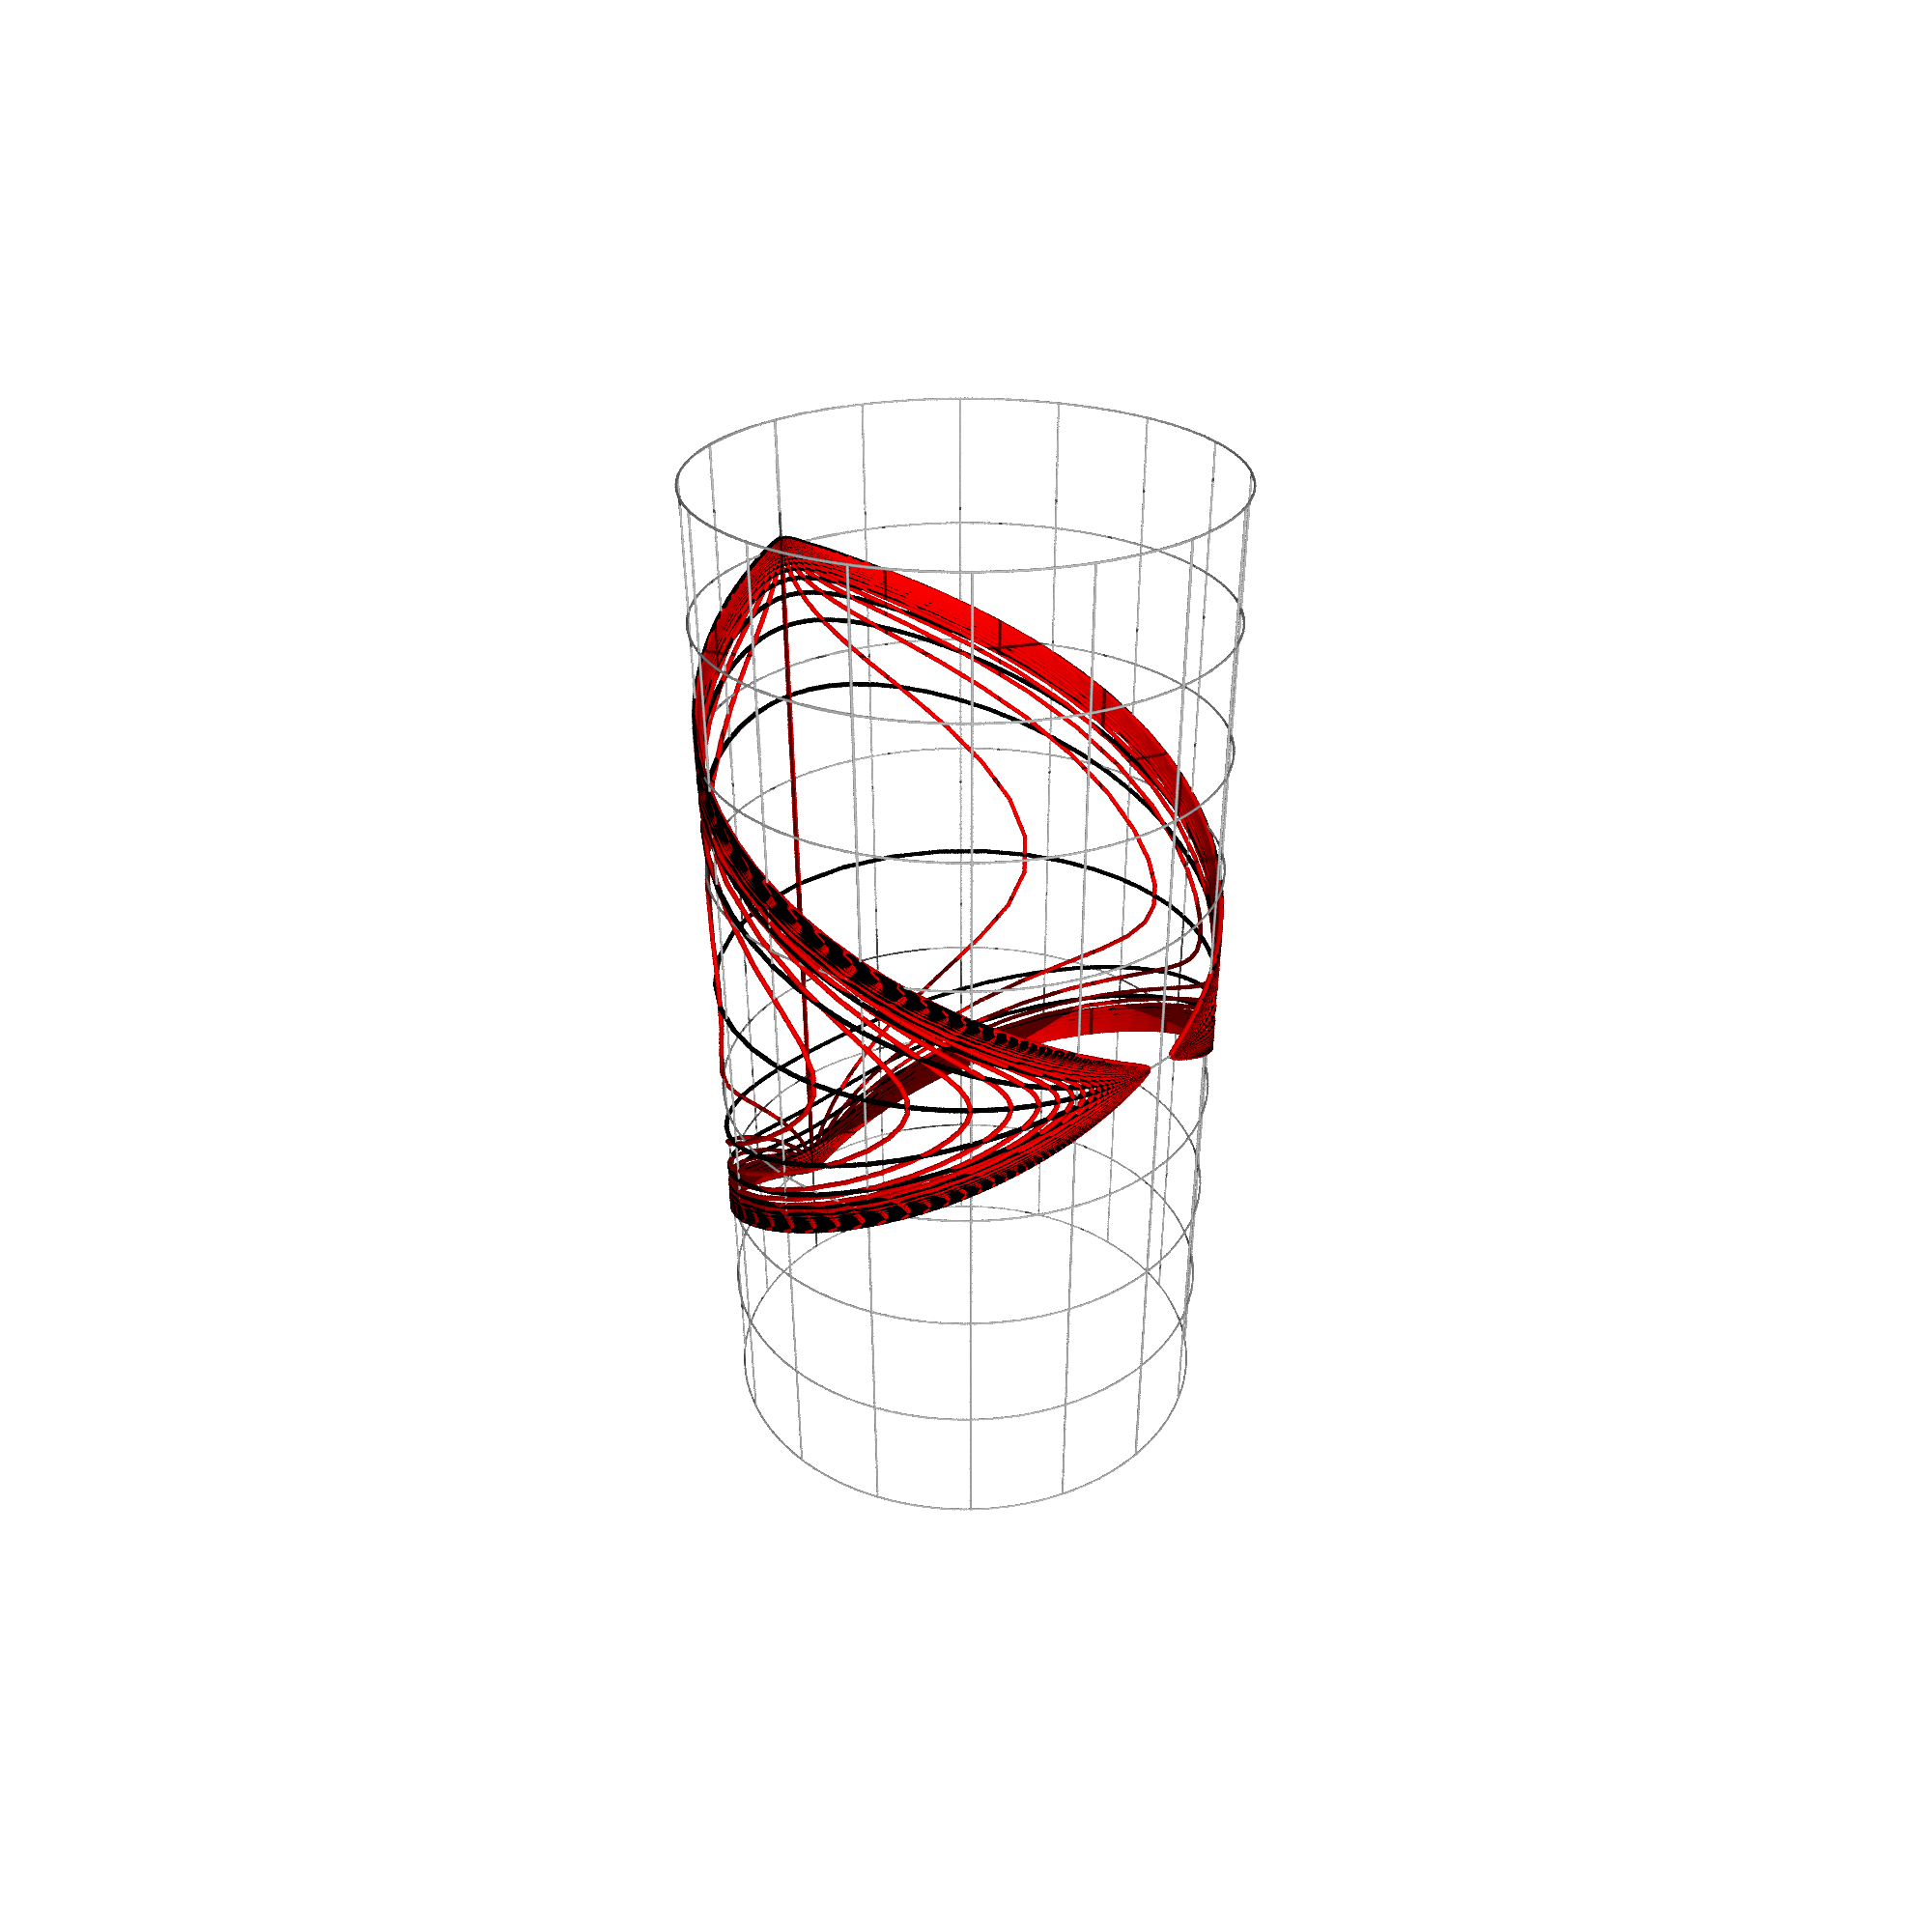

In [72]:
graph = (graphE+graphM).rotate((0,0,1), pi)
show(graph, aspect_ratio=(2,2,1), viewer='tachyon', 
     frame=False, figsize=20)

In [73]:
graphMN = XN.plot(X5, ambient_coords=(W,X,T), mapping=Theta, 
                  fixed_coords={th:pi/2, ph:0.001}, max_range=16, 
                  number_values=21, plot_points=150, color='green', 
                  style={u: '--', v: '-'}, label_axes=False)  # phi = 0 
graphMN += XN.plot(X5, ambient_coords=(W,X,T), mapping=Theta, 
                   fixed_coords={th:pi/2, ph:pi}, max_range=16, 
                   number_values=21, plot_points=150, color='green', 
                   style={u: '--', v: '-'}, label_axes=False)  # phi = pi

In [74]:
show(graphE+graphMN, aspect_ratio=1, frame=False)

Graphics3d Object

In [75]:
graph.save('Einstein_static_universe_B.png', figsize=20)